In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
import pickle
import os
import scipy.stats as st
from itertools import combinations

/home/el10/Downloads/yes/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/el10/Downloads/yes/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/el10/Downloads/yes/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/el10/Downloads/yes/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/el10/Downloads/yes/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/el10/Downloads/yes/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478

In [2]:
model_name = "dtree"
train = pd.read_csv('nyc_demand_train.csv', parse_dates=['timeStamp'])

In [3]:
X = train.drop(['demand', 'timeStamp'], axis=1)

In [4]:
regr = DecisionTreeRegressor()
tscv = TimeSeriesSplit(n_splits=5)

In [5]:
param_dist = {'max_depth': st.randint(2, 20),
              'min_samples_split': st.randint(2, 50),
              'min_samples_leaf': st.randint(1, 100),
              'max_features': range(3,X.shape[1]+1)
             }
regr_cv = RandomizedSearchCV(estimator=regr,
            param_distributions=param_dist,
            n_iter=100,
            cv=tscv,
            iid=False,
            scoring='r2',
            verbose=2,
            n_jobs=-1)
regr_pipe = Pipeline([('regr_cv', regr_cv)])
regr_pipe.fit(X, y=train['demand'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] max_depth=11, max_features=3, min_samples_leaf=43, min_samples_split=19 
[CV] max_depth=11, max_features=3, min_samples_leaf=43, min_samples_split=19 
[CV]  max_depth=11, max_features=3, min_samples_leaf=43, min_samples_split=19, total=   0.0s
[CV] max_depth=11, max_features=3, min_samples_leaf=43, min_samples_split=19 
[CV]  max_depth=11, max_features=3, min_samples_leaf=43, min_samples_split=19, total=   0.0s
[CV]  max_depth=11, max_features=3, min_samples_leaf=43, min_samples_split=19, total=   0.0s
[CV] max_depth=11, max_features=3, min_samples_leaf=43, min_samples_split=19 
[CV]  max_depth=11, max_features=3, min_samples_leaf=43, min_samples_split=19, total=   0.0s
[CV] max_depth=11, max_features=3, min_samples_leaf=43, min_samples_split=19 
[CV] max_depth=9, max_features=29, min_samples_leaf=90, min_samples_split=13 
[CV] max_depth=9, max_features=29, min_samples_leaf=90, min_samples_split=13 
[CV]  max_depth=11,

[CV]  max_depth=17, max_features=26, min_samples_leaf=72, min_samples_split=18, total=   0.0s
[CV] max_depth=17, max_features=26, min_samples_leaf=72, min_samples_split=18 
[CV]  max_depth=7, max_features=13, min_samples_leaf=84, min_samples_split=16, total=   0.1s
[CV]  max_depth=17, max_features=26, min_samples_leaf=72, min_samples_split=18, total=   0.2s
[CV] max_depth=6, max_features=20, min_samples_leaf=29, min_samples_split=8 
[CV] max_depth=7, max_features=13, min_samples_leaf=84, min_samples_split=16 
[CV]  max_depth=14, max_features=29, min_samples_leaf=63, min_samples_split=26, total=   0.1s
[CV]  max_depth=6, max_features=20, min_samples_leaf=29, min_samples_split=8, total=   0.0s
[CV] max_depth=14, max_features=29, min_samples_leaf=63, min_samples_split=26 
[CV]  max_depth=17, max_features=26, min_samples_leaf=72, min_samples_split=18, total=   0.0s
[CV] max_depth=6, max_features=20, min_samples_leaf=29, min_samples_split=8 
[CV] max_depth=17, max_features=26, min_samples_l

[CV]  max_depth=16, max_features=4, min_samples_leaf=56, min_samples_split=35, total=   0.0s
[CV] max_depth=16, max_features=4, min_samples_leaf=56, min_samples_split=35 
[CV]  max_depth=18, max_features=11, min_samples_leaf=49, min_samples_split=10, total=   0.1s
[CV]  max_depth=7, max_features=13, min_samples_leaf=84, min_samples_split=16, total=   0.0s
[CV] max_depth=18, max_features=11, min_samples_leaf=49, min_samples_split=10 
[CV]  max_depth=16, max_features=4, min_samples_leaf=56, min_samples_split=35, total=   0.0s
[CV] max_depth=7, max_features=13, min_samples_leaf=84, min_samples_split=16 
[CV] max_depth=16, max_features=4, min_samples_leaf=56, min_samples_split=35 
[CV]  max_depth=16, max_features=4, min_samples_leaf=56, min_samples_split=35, total=   0.0s
[CV] max_depth=16, max_features=4, min_samples_leaf=56, min_samples_split=35 
[CV]  max_depth=13, max_features=25, min_samples_leaf=9, min_samples_split=18, total=   0.2s
[CV]  max_depth=18, max_features=11, min_samples_l

[CV] max_depth=17, max_features=22, min_samples_leaf=44, min_samples_split=5 
[CV] max_depth=3, max_features=15, min_samples_leaf=12, min_samples_split=29 
[CV]  max_depth=7, max_features=16, min_samples_leaf=89, min_samples_split=18, total=   0.0s
[CV] max_depth=7, max_features=16, min_samples_leaf=89, min_samples_split=18 
[CV]  max_depth=3, max_features=15, min_samples_leaf=12, min_samples_split=29, total=   0.0s
[CV] max_depth=3, max_features=15, min_samples_leaf=12, min_samples_split=29 
[CV]  max_depth=3, max_features=15, min_samples_leaf=12, min_samples_split=29, total=   0.0s
[CV] max_depth=5, max_features=14, min_samples_leaf=54, min_samples_split=11 
[CV]  max_depth=7, max_features=16, min_samples_leaf=89, min_samples_split=18, total=   0.1s
[CV] max_depth=7, max_features=16, min_samples_leaf=89, min_samples_split=18 
[CV]  max_depth=7, max_features=26, min_samples_leaf=10, min_samples_split=12, total=   0.2s
[CV]  max_depth=5, max_features=14, min_samples_leaf=54, min_sample

[CV]  max_depth=11, max_features=29, min_samples_leaf=52, min_samples_split=12, total=   0.0s
[CV] max_depth=11, max_features=29, min_samples_leaf=52, min_samples_split=12 
[CV]  max_depth=16, max_features=3, min_samples_leaf=2, min_samples_split=16, total=   0.0s
[CV] max_depth=16, max_features=3, min_samples_leaf=2, min_samples_split=16 
[CV]  max_depth=13, max_features=27, min_samples_leaf=88, min_samples_split=30, total=   0.1s
[CV]  max_depth=11, max_features=29, min_samples_leaf=52, min_samples_split=12, total=   0.2s
[CV] max_depth=11, max_features=7, min_samples_leaf=61, min_samples_split=10 
[CV] max_depth=5, max_features=26, min_samples_leaf=59, min_samples_split=11 
[CV]  max_depth=16, max_features=3, min_samples_leaf=2, min_samples_split=16, total=   0.0s
[CV]  max_depth=11, max_features=29, min_samples_leaf=52, min_samples_split=12, total=   0.1s
[CV]  max_depth=11, max_features=7, min_samples_leaf=61, min_samples_split=10, total=   0.0s
[CV] max_depth=11, max_features=7, 

[CV] max_depth=18, max_features=4, min_samples_leaf=1, min_samples_split=37 
[CV] max_depth=3, max_features=25, min_samples_leaf=35, min_samples_split=23 
[CV]  max_depth=4, max_features=24, min_samples_leaf=97, min_samples_split=16, total=   0.1s
[CV] max_depth=5, max_features=23, min_samples_leaf=66, min_samples_split=17 
[CV]  max_depth=18, max_features=4, min_samples_leaf=1, min_samples_split=37, total=   0.0s
[CV] max_depth=18, max_features=4, min_samples_leaf=1, min_samples_split=37 
[CV]  max_depth=5, max_features=23, min_samples_leaf=66, min_samples_split=17, total=   0.0s
[CV] max_depth=5, max_features=23, min_samples_leaf=66, min_samples_split=17 
[CV]  max_depth=3, max_features=25, min_samples_leaf=35, min_samples_split=23, total=   0.1s
[CV]  max_depth=18, max_features=4, min_samples_leaf=1, min_samples_split=37, total=   0.0s
[CV] max_depth=4, max_features=5, min_samples_leaf=73, min_samples_split=34 
[CV] max_depth=18, max_features=4, min_samples_leaf=1, min_samples_split

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    5.1s


[CV] max_depth=12, max_features=13, min_samples_leaf=78, min_samples_split=48 
[CV]  max_depth=11, max_features=12, min_samples_leaf=39, min_samples_split=6, total=   0.0s
[CV] max_depth=11, max_features=12, min_samples_leaf=39, min_samples_split=6 
[CV]  max_depth=12, max_features=13, min_samples_leaf=78, min_samples_split=48, total=   0.0s
[CV] max_depth=12, max_features=13, min_samples_leaf=78, min_samples_split=48 
[CV]  max_depth=11, max_features=12, min_samples_leaf=39, min_samples_split=6, total=   0.0s
[CV]  max_depth=15, max_features=22, min_samples_leaf=54, min_samples_split=43, total=   0.1s
[CV] max_depth=15, max_features=22, min_samples_leaf=54, min_samples_split=43 
[CV] max_depth=19, max_features=7, min_samples_leaf=55, min_samples_split=11 
[CV]  max_depth=12, max_features=13, min_samples_leaf=78, min_samples_split=48, total=   0.0s
[CV] max_depth=12, max_features=13, min_samples_leaf=78, min_samples_split=48 
[CV]  max_depth=19, max_features=7, min_samples_leaf=55, min

[CV]  max_depth=2, max_features=4, min_samples_leaf=48, min_samples_split=7, total=   0.0s
[CV] max_depth=14, max_features=18, min_samples_leaf=80, min_samples_split=14 
[CV] max_depth=2, max_features=4, min_samples_leaf=48, min_samples_split=7 
[CV]  max_depth=8, max_features=17, min_samples_leaf=63, min_samples_split=11, total=   0.1s
[CV] max_depth=15, max_features=15, min_samples_leaf=98, min_samples_split=40 
[CV]  max_depth=2, max_features=4, min_samples_leaf=48, min_samples_split=7, total=   0.0s
[CV]  max_depth=14, max_features=18, min_samples_leaf=80, min_samples_split=14, total=   0.0s
[CV] max_depth=8, max_features=17, min_samples_leaf=63, min_samples_split=11 
[CV] max_depth=14, max_features=18, min_samples_leaf=80, min_samples_split=14 
[CV]  max_depth=15, max_features=15, min_samples_leaf=98, min_samples_split=40, total=   0.0s
[CV] max_depth=15, max_features=15, min_samples_leaf=98, min_samples_split=40 
[CV]  max_depth=8, max_features=17, min_samples_leaf=63, min_sample

[CV] max_depth=14, max_features=22, min_samples_leaf=99, min_samples_split=25 
[CV]  max_depth=13, max_features=28, min_samples_leaf=69, min_samples_split=34, total=   0.1s
[CV] max_depth=13, max_features=28, min_samples_leaf=69, min_samples_split=34 
[CV]  max_depth=5, max_features=12, min_samples_leaf=35, min_samples_split=10, total=   0.1s
[CV] max_depth=8, max_features=4, min_samples_leaf=91, min_samples_split=14 
[CV]  max_depth=8, max_features=4, min_samples_leaf=91, min_samples_split=14, total=   0.0s
[CV] max_depth=8, max_features=4, min_samples_leaf=91, min_samples_split=14 
[CV]  max_depth=8, max_features=4, min_samples_leaf=91, min_samples_split=14, total=   0.0s
[CV] max_depth=8, max_features=4, min_samples_leaf=91, min_samples_split=14 
[CV]  max_depth=13, max_features=28, min_samples_leaf=69, min_samples_split=34, total=   0.1s
[CV] max_depth=13, max_features=28, min_samples_leaf=69, min_samples_split=34 
[CV]  max_depth=14, max_features=22, min_samples_leaf=99, min_sampl

[CV]  max_depth=3, max_features=9, min_samples_leaf=81, min_samples_split=7, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=81, min_samples_split=7 
[CV]  max_depth=3, max_features=9, min_samples_leaf=81, min_samples_split=7, total=   0.0s
[CV]  max_depth=16, max_features=25, min_samples_leaf=8, min_samples_split=47, total=   0.2s
[CV] max_depth=16, max_features=25, min_samples_leaf=8, min_samples_split=47 
[CV] max_depth=15, max_features=8, min_samples_leaf=20, min_samples_split=19 
[CV]  max_depth=7, max_features=12, min_samples_leaf=12, min_samples_split=44, total=   0.0s
[CV] max_depth=7, max_features=12, min_samples_leaf=12, min_samples_split=44 
[CV]  max_depth=15, max_features=8, min_samples_leaf=20, min_samples_split=19, total=   0.0s
[CV]  max_depth=3, max_features=9, min_samples_leaf=81, min_samples_split=7, total=   0.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=81, min_samples_split=7 
[CV] max_depth=15, max_features=8, min_samples_leaf=20, min_sa

[CV]  max_depth=2, max_features=9, min_samples_leaf=52, min_samples_split=24, total=   0.0s
[CV] max_depth=2, max_features=9, min_samples_leaf=52, min_samples_split=24 
[CV] max_depth=18, max_features=30, min_samples_leaf=99, min_samples_split=45 
[CV]  max_depth=12, max_features=15, min_samples_leaf=55, min_samples_split=24, total=   0.1s
[CV] max_depth=2, max_features=7, min_samples_leaf=83, min_samples_split=45 
[CV]  max_depth=6, max_features=10, min_samples_leaf=33, min_samples_split=9, total=   0.0s
[CV]  max_depth=2, max_features=7, min_samples_leaf=83, min_samples_split=45, total=   0.0s
[CV] max_depth=6, max_features=10, min_samples_leaf=33, min_samples_split=9 
[CV] max_depth=2, max_features=7, min_samples_leaf=83, min_samples_split=45 
[CV]  max_depth=2, max_features=9, min_samples_leaf=52, min_samples_split=24, total=   0.0s
[CV] max_depth=2, max_features=9, min_samples_leaf=52, min_samples_split=24 
[CV]  max_depth=2, max_features=7, min_samples_leaf=83, min_samples_split=

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.0s finished


Pipeline(memory=None,
     steps=[('regr_cv', RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
          error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_s...obs', random_state=None, refit=True,
          return_train_score='warn', scoring='r2', verbose=2))])

In [46]:
with open(model_name + '.pkl', 'wb') as f:
    pickle.dump(regr_pipe, f)

In [6]:
cv_results = pd.DataFrame(regr_pipe.named_steps['regr_cv'].cv_results_)
cv_results.sort_values(by='rank_test_score', inplace=True)
cv_results.head()

/home/el10/Downloads/yes/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/el10/Downloads/yes/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/el10/Downloads/yes/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/el10/Downloads/yes/li

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
19,0.117825,0.001144,0.892996,0.987672,13,25,9,18,"{'max_depth': 13, 'max_features': 25, 'min_sam...",1,...,0.897707,0.987853,0.920568,0.990124,0.943752,0.989507,0.069223,0.000177,0.043702,0.002009
12,0.131958,0.001060,0.877679,0.978180,10,30,24,45,"{'max_depth': 10, 'max_features': 30, 'min_sam...",2,...,0.883887,0.980092,0.937835,0.982791,0.947208,0.981817,0.063699,0.000106,0.060243,0.004302
25,0.092952,0.001081,0.873707,0.956632,12,27,61,44,"{'max_depth': 12, 'max_features': 27, 'min_sam...",3,...,0.882705,0.960415,0.932812,0.967399,0.925189,0.967129,0.047184,0.000146,0.051745,0.010555
8,0.104830,0.002403,0.871296,0.969419,14,18,26,6,"{'max_depth': 14, 'max_features': 18, 'min_sam...",4,...,0.906358,0.967815,0.906599,0.975903,0.917055,0.974959,0.056270,0.002724,0.047611,0.005553
59,0.111318,0.001166,0.869239,0.989565,10,21,4,13,"{'max_depth': 10, 'max_features': 21, 'min_sam...",5,...,0.940808,0.989987,0.909788,0.988065,0.932281,0.987359,0.048744,0.000248,0.073031,0.001673


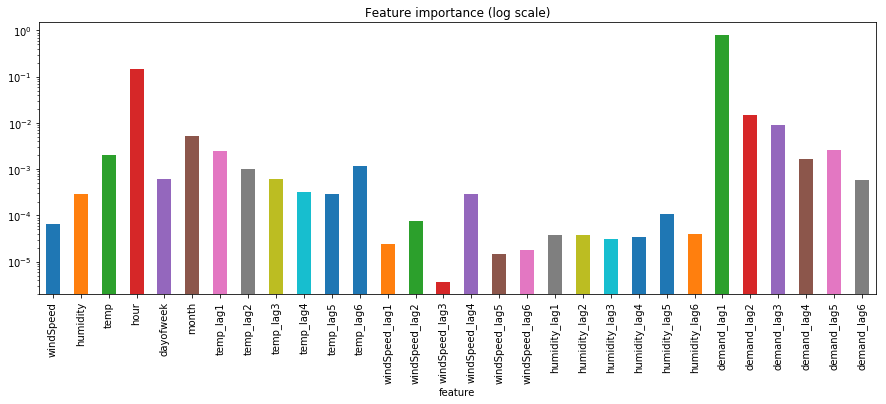

In [7]:
feature_importance = pd.DataFrame.from_dict({'feature':X.columns, 'importance':regr_pipe.named_steps['regr_cv'].best_estimator_.feature_importances_})
feature_importance.plot.bar('feature', 'importance', figsize=(15,5), logy=True, title='Feature importance (log scale)', legend=False)
plt.show()